In [549]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [550]:
df=df = pd.read_csv('StudentDepressionDataset.csv')

In [551]:
df.sample(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
13171,66751,Male,24.0,Nagpur,Student,1.0,0.0,8.58,5.0,0.0,5-6 hours,Healthy,BE,Yes,3.0,5.0,No,0
2548,13005,Male,20.0,Ludhiana,Student,3.0,0.0,5.37,4.0,0.0,7-8 hours,Healthy,Class 12,Yes,11.0,5.0,Yes,1
14444,73005,Male,19.0,Hyderabad,Student,1.0,0.0,6.59,2.0,0.0,More than 8 hours,Unhealthy,Class 12,Yes,11.0,3.0,Yes,1


In [552]:
# CHANGING THE NAME OF THE COLUMNS WITH ? SUCH AS 'Have_you_ever_had_suicidal_thoughts' TO 'Have_you_ever_had_suicidal_thoughts'
df.columns = df.columns.str.replace('?', '')
# CHANGING THE NAME OF THE COLUMNS WITH GAP WITHOUT SPACE SUCH AS 'Financial Stress' TO 'Financial_Stress', 'Study Satisfaction' TO 'Study_Satisfaction'
df.columns = df.columns.str.replace(' ', '_')

df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic_Pressure',
       'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction',
       'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Have_you_ever_had_suicidal_thoughts_', 'Work/Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')

In [553]:
# remove id column as it is not needed
df.drop('id', axis=1, inplace=True)
df.shape



(27901, 17)

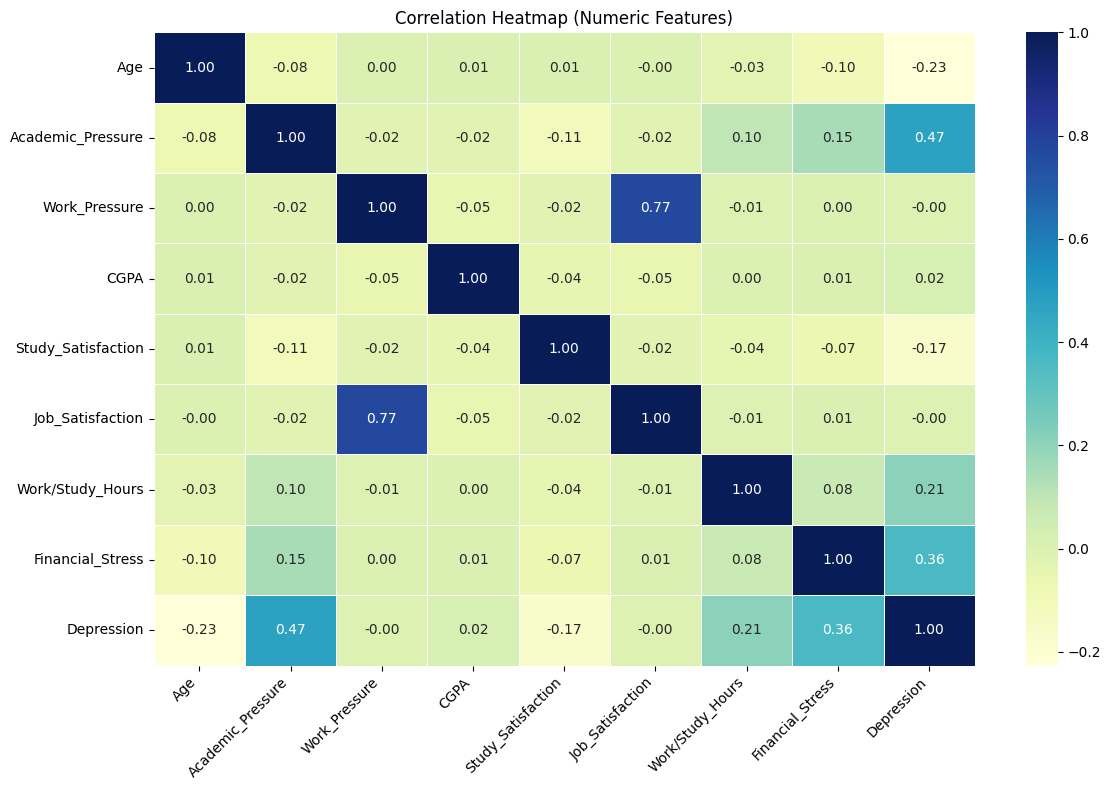

In [554]:

# heatmap to see which columns need changes

plt.figure(figsize=(12, 8))
# heatmaps code  
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)  # Adjust formatting

# Customize heatmap appearance
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
# run the code 
plt.show()

In [555]:
# age,work pressure,study satisfaction in numericals gives less correlation
# financial stress,work hours,academic pressure has more correlation to depression

In [556]:
df.nunique()

Gender                                    2
Age                                      34
City                                     52
Profession                               14
Academic_Pressure                         6
Work_Pressure                             3
CGPA                                    332
Study_Satisfaction                        6
Job_Satisfaction                          5
Sleep_Duration                            5
Dietary_Habits                            4
Degree                                   28
Have_you_ever_had_suicidal_thoughts_      2
Work/Study_Hours                         13
Financial_Stress                          5
Family_History_of_Mental_Illness          2
Depression                                2
dtype: int64

In [557]:
missing_values_count = df.isnull().sum()
print("Number of Missing Values in Each Column:\n", missing_values_count)

Number of Missing Values in Each Column:
 Gender                                  0
Age                                     0
City                                    0
Profession                              0
Academic_Pressure                       0
Work_Pressure                           0
CGPA                                    0
Study_Satisfaction                      0
Job_Satisfaction                        0
Sleep_Duration                          0
Dietary_Habits                          0
Degree                                  0
Have_you_ever_had_suicidal_thoughts_    0
Work/Study_Hours                        0
Financial_Stress                        3
Family_History_of_Mental_Illness        0
Depression                              0
dtype: int64


In [558]:
# make missing values of financial stress to be the mean of the column
df['Financial_Stress'].fillna(df['Financial_Stress'].mean(), inplace=True)
# ensure that there are no missing values
df.isnull().sum()


C:\Users\aslam\AppData\Local\Temp\ipykernel_39420\3794617652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial_Stress'].fillna(df['Financial_Stress'].mean(), inplace=True)


Gender                                  0
Age                                     0
City                                    0
Profession                              0
Academic_Pressure                       0
Work_Pressure                           0
CGPA                                    0
Study_Satisfaction                      0
Job_Satisfaction                        0
Sleep_Duration                          0
Dietary_Habits                          0
Degree                                  0
Have_you_ever_had_suicidal_thoughts_    0
Work/Study_Hours                        0
Financial_Stress                        0
Family_History_of_Mental_Illness        0
Depression                              0
dtype: int64

In [559]:
df.shape

(27901, 17)

In [560]:
# checking unique values in financial stress column
df['Financial_Stress'].value_counts()

Financial_Stress
5.000000    6715
4.000000    5775
3.000000    5226
1.000000    5121
2.000000    5061
3.139867       3
Name: count, dtype: int64

In [561]:
# removing rows with values of age appearing less than or equal to 4 times as they are not enough to make a good prediction
df = df[df['Financial_Stress'].map(df['Financial_Stress'].value_counts()) >=4]

In [562]:
df.sample(3)

,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Work/Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
1020,Male,20.0,Agra,Student,3.0,0.0,7.68,1.0,0.0,More than 8 hours,Healthy,Class 12,Yes,7.0,1.0,No,0
23243,Male,27.0,Hyderabad,Student,5.0,0.0,7.09,4.0,0.0,7-8 hours,Unhealthy,BBA,Yes,11.0,5.0,Yes,1
25245,Male,33.0,Patna,Student,5.0,0.0,6.88,3.0,0.0,Less than 5 hours,Unhealthy,LLB,Yes,10.0,5.0,Yes,1


In [563]:
df.nunique()

Gender                                    2
Age                                      34
City                                     52
Profession                               14
Academic_Pressure                         6
Work_Pressure                             3
CGPA                                    332
Study_Satisfaction                        6
Job_Satisfaction                          5
Sleep_Duration                            5
Dietary_Habits                            4
Degree                                   28
Have_you_ever_had_suicidal_thoughts_      2
Work/Study_Hours                         13
Financial_Stress                          5
Family_History_of_Mental_Illness          2
Depression                                2
dtype: int64

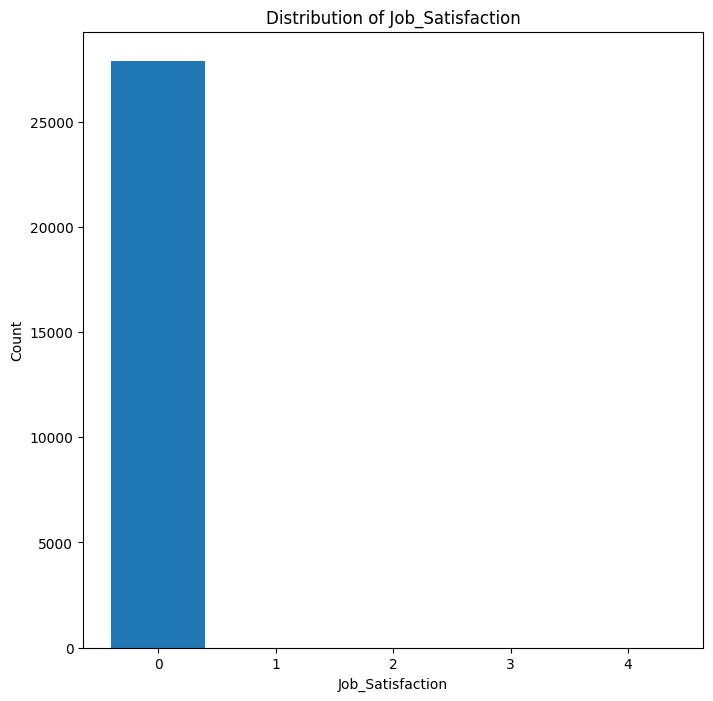

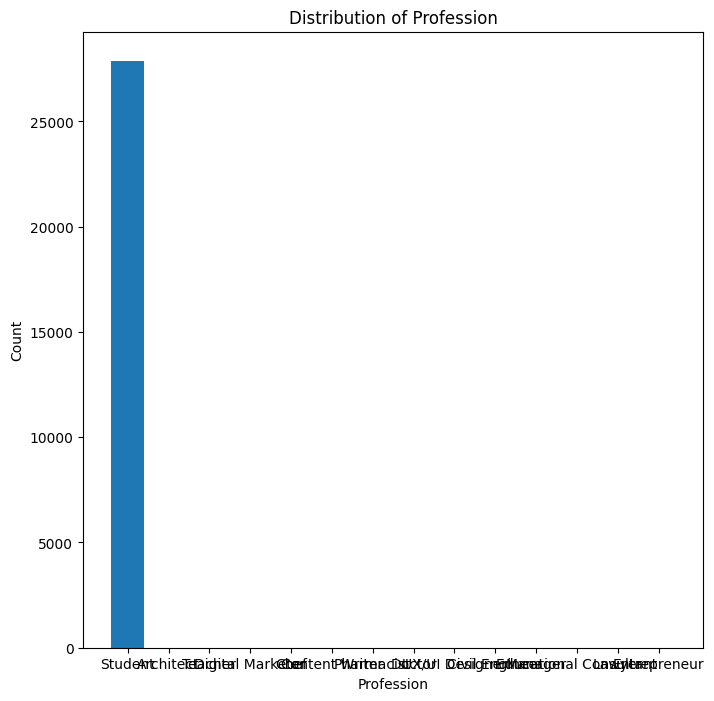

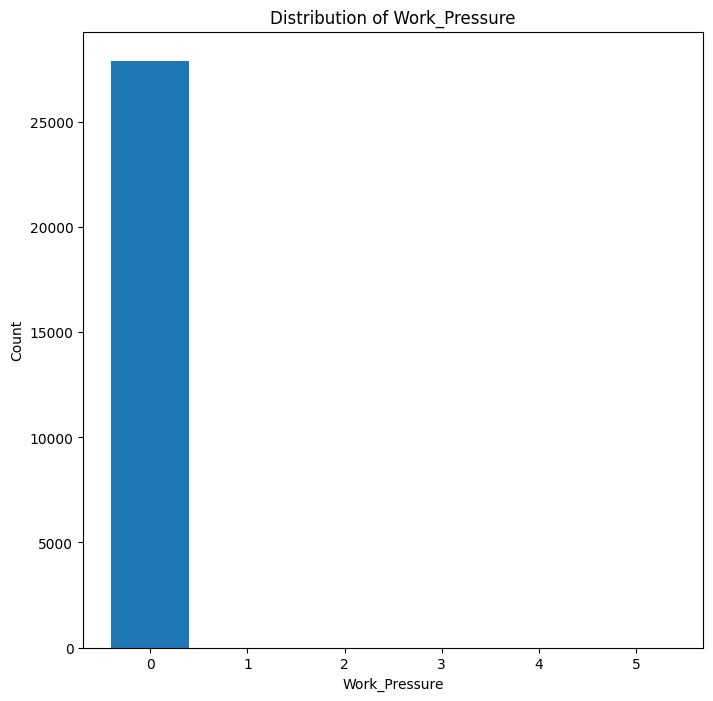

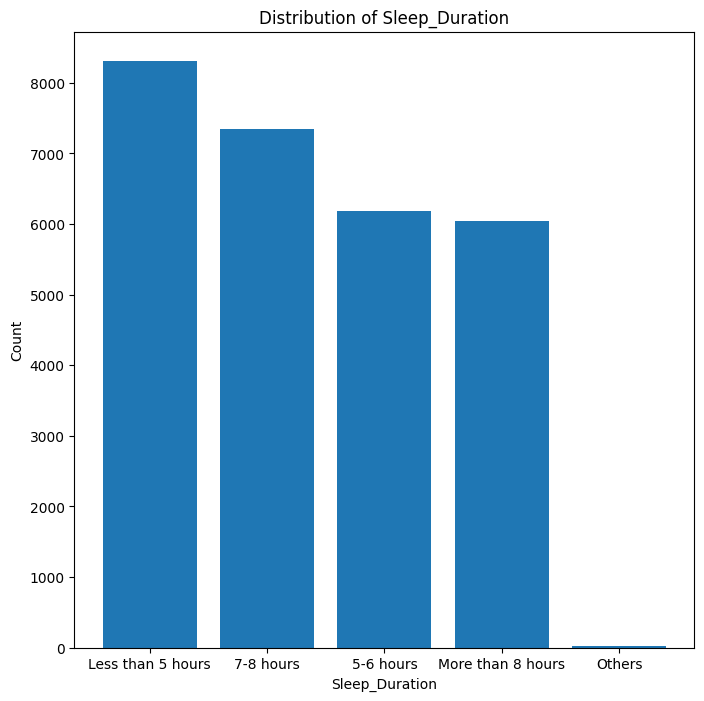

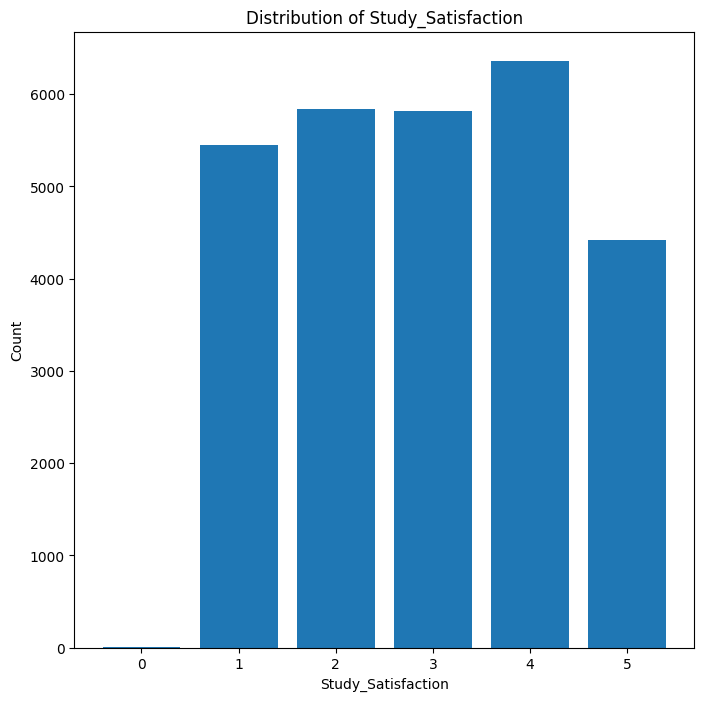

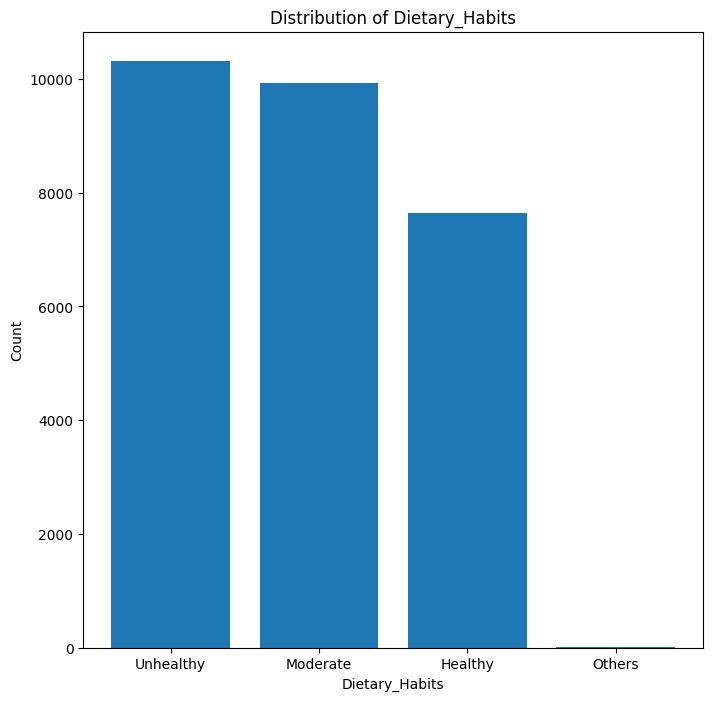

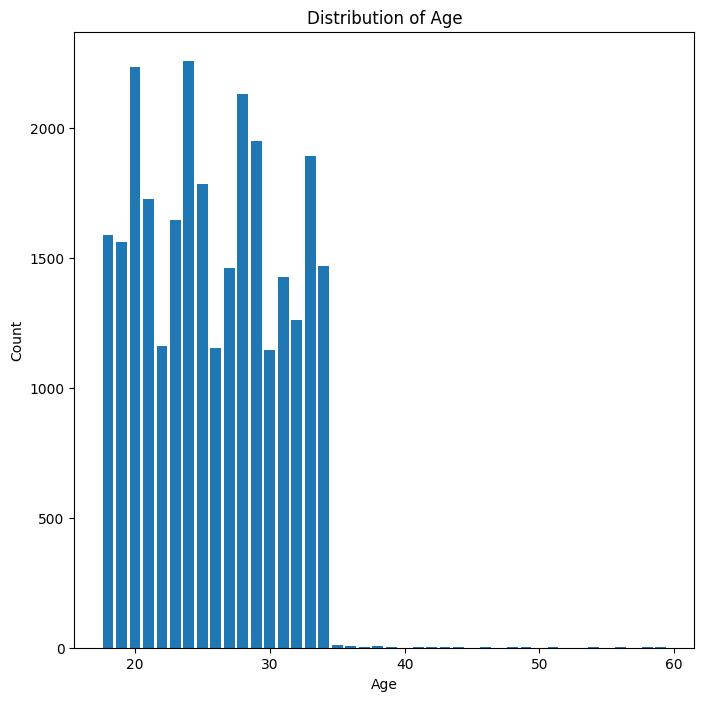

In [564]:
def create_bar_chart(df, column_name):

  value_counts = df[column_name].value_counts()
  plt.figure(figsize=(8,8 ))  
  plt.bar(value_counts.index, value_counts)
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.title(f'Distribution of {column_name}')
  
  plt.show()

# Example usage:
# Assuming you have a DataFrame named 'df'

create_bar_chart(df, 'Job_Satisfaction') 
create_bar_chart(df, 'Profession')
create_bar_chart(df, 'Work_Pressure') 
create_bar_chart(df,'Sleep_Duration')
create_bar_chart(df,'Study_Satisfaction')
create_bar_chart(df,'Dietary_Habits')
create_bar_chart(df,'Age')


In [565]:
# while evaluating the df.nununique() and visuals 
# job satisfaction is mostly 0, so we can drop it, as it will not be useful
# profession is mostly student, so we can drop it, as it will not be useful
# work pressure is mostly 0, so we can drop it, as it will not be useful
df.drop(['Job_Satisfaction', 'Profession','Work_Pressure'], axis=1, inplace=True)


In [566]:
# from nununique and visual of barchart 
#  Remove Rows with 'Others' in Sleep Duration, Dietary Habits, Degree as they appear to less times
#  reminder better to do a visual for the others
df = df[~df['Sleep_Duration'].str.contains('Others', na=False)]
df = df[~df['Dietary_Habits'].str.contains('Others', na=False)]
df = df[~df['Degree'].str.contains('Others', na=False)]

#  Remove Rows with Study Satisfaction Value Equal to 0
df = df[df['Study_Satisfaction'] != 0]

# check the shape of the data after cleaning
df.shape


(27823, 14)

In [567]:
df.nunique()

Gender                                    2
Age                                      34
City                                     52
Academic_Pressure                         6
CGPA                                    332
Study_Satisfaction                        5
Sleep_Duration                            4
Dietary_Habits                            3
Degree                                   27
Have_you_ever_had_suicidal_thoughts_      2
Work/Study_Hours                         13
Financial_Stress                          5
Family_History_of_Mental_Illness          2
Depression                                2
dtype: int64

In [568]:
df['Age'].value_counts()

Age
24.0    2254
20.0    2230
28.0    2126
29.0    1946
33.0    1890
25.0    1781
21.0    1724
23.0    1638
18.0    1581
19.0    1559
34.0    1464
27.0    1457
31.0    1423
32.0    1255
22.0    1157
26.0    1152
30.0    1138
35.0      10
38.0       7
36.0       7
42.0       4
39.0       3
48.0       3
46.0       2
43.0       2
37.0       2
44.0       1
51.0       1
49.0       1
58.0       1
54.0       1
59.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [569]:
# from the value counts and the bar chart visuals
# removing rows with values of age appearing less than or equal to 10 times as they are not enough to make a good prediction
df = df[df['Age'].map(df['Age'].value_counts()) >= 11]

# check the shape of the data after cleaning
df.shape

(27775, 14)

In [570]:
df.nunique()

Gender                                    2
Age                                      17
City                                     52
Academic_Pressure                         6
CGPA                                    331
Study_Satisfaction                        5
Sleep_Duration                            4
Dietary_Habits                            3
Degree                                   27
Have_you_ever_had_suicidal_thoughts_      2
Work/Study_Hours                         13
Financial_Stress                          5
Family_History_of_Mental_Illness          2
Depression                                2
dtype: int64

In [571]:

df['City'].value_counts()

# using the value counts
# removing rows with values of City appearing less than or equal to 3 times as they are not enough to make a good prediction
df = df[df['City'].map(df['City'].value_counts()) >= 3]

In [572]:
# there is too  many degrees, so we can group them into 3 categories by using our existing knowledge of degrees
df['Degree'].value_counts()
# we can see that there are many degrees, so we can group them into 3 categories for better encoding later 

# making class 12th as higher secondary
df['Degree'] = df['Degree'].replace('Class 12th', 'Higher Secondary')


In [573]:
# making bachelors
bachelors_replacements = {
    'B.Ed': 'Bachelor',
    'B.Com': 'Bachelor',
    'B.Pharm': 'Bachelor',
    'BCA': 'Bachelor',
    'BE': 'Bachelor',
    'BHM': 'Bachelor',
    'MBBS': 'Bachelor', 
    'LLB': 'Bachelor',
    'BA': 'Bachelor',
    'B.Arch': 'Bachelor',
    'BBA': 'Bachelor',
    'B.Tech': 'Bachelor',
    'BSc': 'Bachelor',
}

# Apply replacements
df['Degree'] = df['Degree'].replace(bachelors_replacements)

In [574]:
# making masters
master_replacements = {
    'M.Tech': 'Master',
    'MCA': 'Master',
    'MBA': 'Master',
    'MSc': 'Master',
    'M.Com': 'Master',
    'MA': 'Master',
    'MHM': 'Master',
    'M.Arch': 'Master',
    'M.Pharm': 'Master',
    'ME': 'Master',  
    'LLM': 'Master',
    'MD': 'Master',  
    'M.Ed': 'Master',
    'PhD': 'Master' 
}

# Apply replacements
df['Degree'] = df['Degree'].replace(master_replacements)



In [575]:
# mental illness,sucidial thoughts, and gender are objects but only got 2 answers but in string  so we can convert them to binary
df['Family_History_of_Mental_Illness'] = df['Family_History_of_Mental_Illness'].map({'Yes': 1, 'No': 0})
df['Have_you_ever_had_suicidal_thoughts_'] = df['Have_you_ever_had_suicidal_thoughts_'].map({'Yes': 1, 'No': 0})
df['Gender']=df['Gender'].map({'Male':1 , 'Female':0})
# renaming for better use
df = df.rename(columns={'Work/Study_Hours': 'Work_Study_Hours'})

In [576]:
df

,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Work_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,1,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,Bachelor,1,3.0,1.0,0,1
1,0,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,Bachelor,0,3.0,2.0,1,0
2,1,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,Bachelor,0,9.0,1.0,1,0
3,0,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,Bachelor,1,4.0,5.0,1,1
4,0,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,Master,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,1,7.0,1.0,1,0
27897,1,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,Master,0,0.0,3.0,1,0
27898,1,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,Master,0,12.0,2.0,0,0
27899,0,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,1,10.0,5.0,0,1


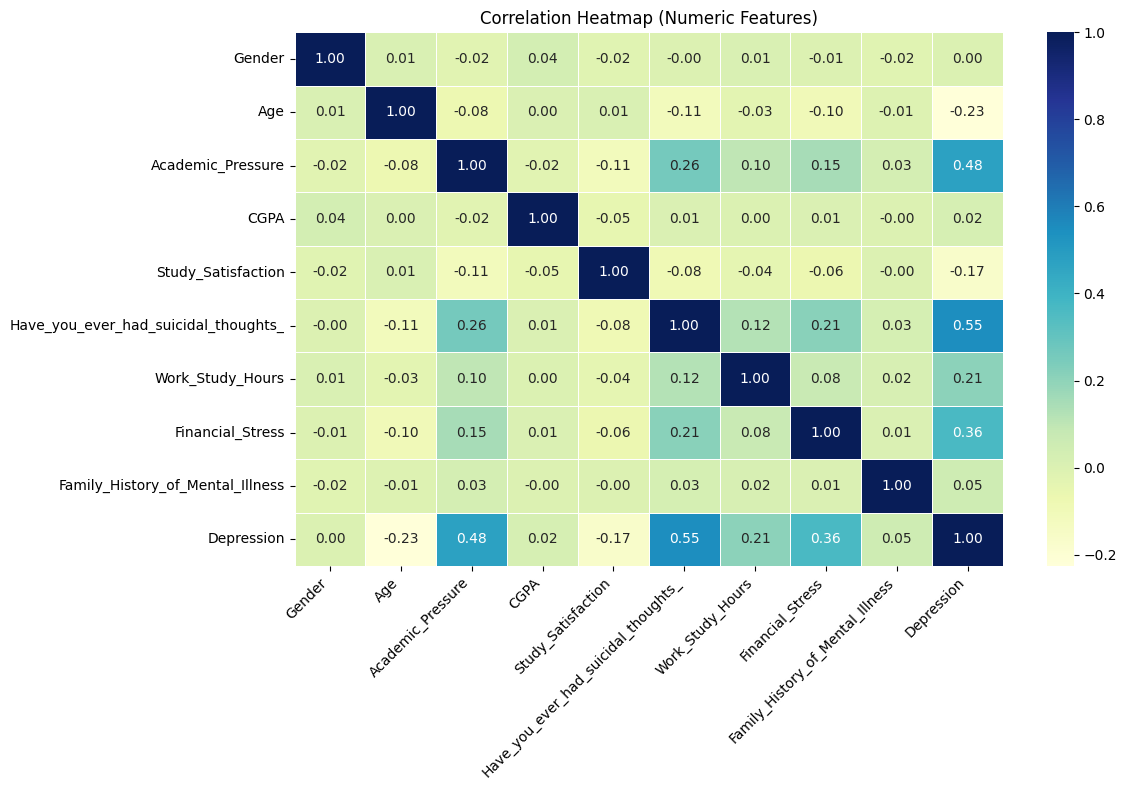

In [577]:

# heatmap to see how the columns correlation changed after the cleaning and exploration

plt.figure(figsize=(12, 8))
# heatmaps code  
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)  # Adjust formatting

# Customize heatmap appearance
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
# run the code 
plt.show()

In [578]:
# creating a new cdv file with the current df
df.to_csv('csv_files/semi_cleaned_depression_file.csv', index=False)

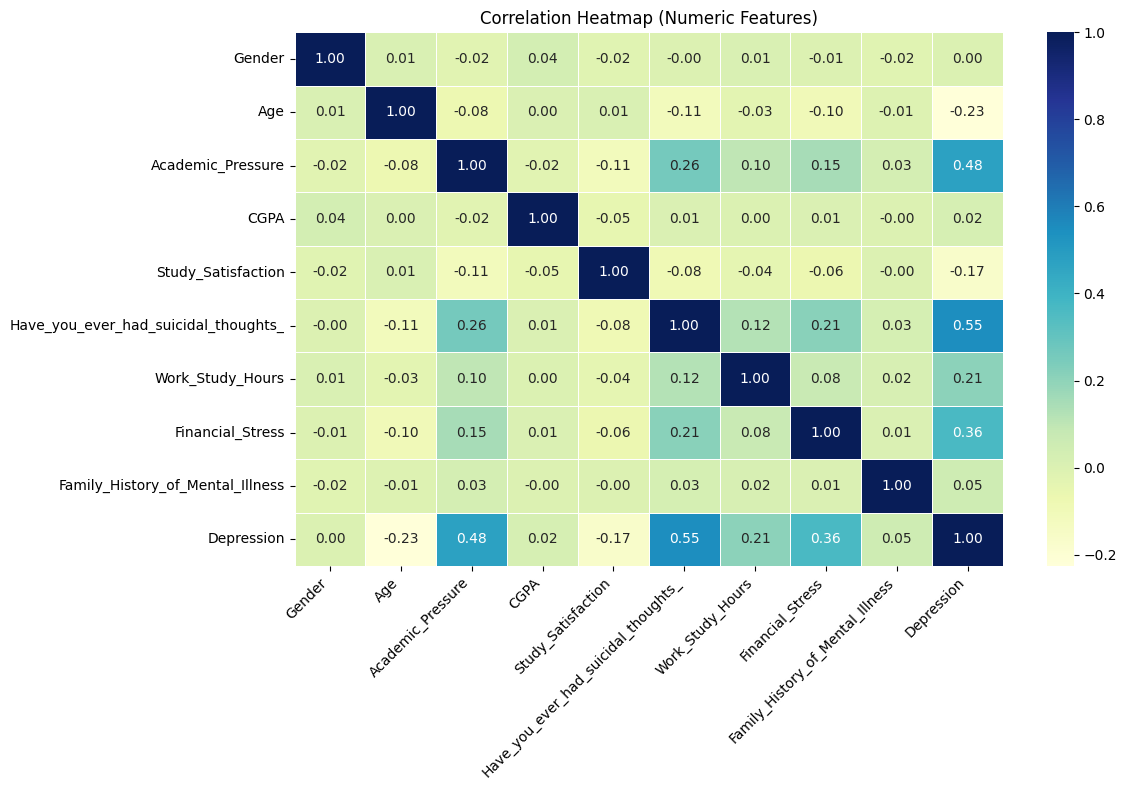

In [579]:

# heatmap to see which columns need changes

plt.figure(figsize=(12, 8))
# heatmaps code  
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)  # Adjust formatting

# Customize heatmap appearance
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
# run the code 
plt.show()

In [580]:
# doing one hot encoding for the categorical variables
df = pd.get_dummies(df, columns=['City', 'Degree', 'Sleep_Duration', 'Dietary_Habits'])


In [581]:
df.shape

(27749, 50)

In [582]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 27749 entries, 0 to 27900
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gender                                27749 non-null  int64  
 1   Age                                   27749 non-null  float64
 2   Academic_Pressure                     27749 non-null  float64
 3   CGPA                                  27749 non-null  float64
 4   Study_Satisfaction                    27749 non-null  float64
 5   Have_you_ever_had_suicidal_thoughts_  27749 non-null  int64  
 6   Work_Study_Hours                      27749 non-null  float64
 7   Financial_Stress                      27749 non-null  float64
 8   Family_History_of_Mental_Illness      27749 non-null  int64  
 9   Depression                            27749 non-null  int64  
 10  City_Agra                             27749 non-null  bool   
 11  City_Ahmedabad      

In [583]:
# split data into X and y
X=df.drop('Depression', axis=1)
y=df['Depression']


In [584]:
X.nunique()

Gender                                    2
Age                                      17
Academic_Pressure                         6
CGPA                                    331
Study_Satisfaction                        5
Have_you_ever_had_suicidal_thoughts_      2
Work_Study_Hours                         13
Financial_Stress                          5
Family_History_of_Mental_Illness          2
City_Agra                                 2
City_Ahmedabad                            2
City_Bangalore                            2
City_Bhopal                               2
City_Chennai                              2
City_Delhi                                2
City_Faridabad                            2
City_Ghaziabad                            2
City_Hyderabad                            2
City_Indore                               2
City_Jaipur                               2
City_Kalyan                               2
City_Kanpur                               2
City_Kolkata                    

In [585]:
# to make reading the columns easier in streamlit 
df.columns = df.columns.str.replace(' ', '_')


df.columns


Index(['Gender', 'Age', 'Academic_Pressure', 'CGPA', 'Study_Satisfaction',
       'Have_you_ever_had_suicidal_thoughts_', 'Work_Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression',
       'City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat',
       'City_Thane', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Degree_Bachelor', 'Degree_Class_12',
       'Degree_Master', 'Sleep_Duration_5-6_hours', 'Sleep_Duration_7-8_hours',
       'Sleep_Duration_Less_than_5_hours', 'Sleep_Duration_More_than_8_hours',
       'Dietary_Habits_Healthy', 'Dietary_Habits

In [586]:
# to make reading the columns easier in streamlit 
X.columns = X.columns.str.replace(' ', '_')
X.columns

Index(['Gender', 'Age', 'Academic_Pressure', 'CGPA', 'Study_Satisfaction',
       'Have_you_ever_had_suicidal_thoughts_', 'Work_Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'City_Agra',
       'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal', 'City_Chennai',
       'City_Delhi', 'City_Faridabad', 'City_Ghaziabad', 'City_Hyderabad',
       'City_Indore', 'City_Jaipur', 'City_Kalyan', 'City_Kanpur',
       'City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_Meerut',
       'City_Mumbai', 'City_Nagpur', 'City_Nashik', 'City_Patna', 'City_Pune',
       'City_Rajkot', 'City_Srinagar', 'City_Surat', 'City_Thane',
       'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Degree_Bachelor', 'Degree_Class_12',
       'Degree_Master', 'Sleep_Duration_5-6_hours', 'Sleep_Duration_7-8_hours',
       'Sleep_Duration_Less_than_5_hours', 'Sleep_Duration_More_than_8_hours',
       'Dietary_Habits_Healthy', 'Dietary_Habits_Moderate',
  

In [587]:
# creating a new cdv file with the current df
df.to_csv('csv_files/update_ohe_file.csv', index=False)

In [588]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [589]:
# gbr 

# imports
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.metrics import r2_score

# training model
gbr=ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    loss='huber'
)
gbr.fit(X_train, y_train)

# r2 score
y_pred_GBR=gbr.predict(X_test)
R2_score=r2_score(y_test, y_pred_GBR)
print('R2 SCORE:', R2_score)


# to check the mean squared error of the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_GBR)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_GBR))

# to check the mean absolute error of the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_GBR)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_GBR))


# FEATURE IMPORTANCE
# feature_importance

feature_columns=np.array(X.columns)

importance=gbr.feature_importances_

index_by_importance=importance.argsort()

for index in index_by_importance:
    print("{}-{:.2f}%".format(feature_columns[index],importance[index]*100.0))



R2 SCORE: 0.5137916579773179
Mean Squared Error: 0.11793042725708597
Mean Absolute Error: 0.2339308135173673
City_Faridabad-0.01%
Degree_Class_12-0.01%
City_Surat-0.01%
City_Bangalore-0.01%
City_Kalyan-0.01%
City_Mumbai-0.02%
Dietary_Habits_Moderate-0.02%
City_Thane-0.02%
City_Kanpur-0.02%
City_Pune-0.02%
City_Chennai-0.02%
City_Delhi-0.02%
City_Vadodara-0.03%
City_Visakhapatnam-0.03%
City_Ludhiana-0.03%
City_Bhopal-0.03%
Degree_Master-0.03%
Degree_Bachelor-0.03%
City_Ghaziabad-0.04%
Sleep_Duration_7-8_hours-0.04%
City_Meerut-0.04%
City_Patna-0.04%
City_Srinagar-0.04%
City_Kolkata-0.04%
City_Vasai-Virar-0.05%
City_Agra-0.05%
City_Nashik-0.05%
City_Varanasi-0.05%
Sleep_Duration_5-6_hours-0.05%
City_Nagpur-0.05%
City_Rajkot-0.05%
City_Indore-0.06%
City_Lucknow-0.06%
Gender-0.07%
City_Ahmedabad-0.09%
City_Hyderabad-0.09%
City_Jaipur-0.11%
Sleep_Duration_More_than_8_hours-0.15%
Family_History_of_Mental_Illness-0.18%
Sleep_Duration_Less_than_5_hours-0.36%
Dietary_Habits_Healthy-0.89%
CGPA-1

In [590]:
# GBC 

# IMPORTS
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble

# train data
gbc=ensemble.GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    loss='exponential'
)
gbc.fit(X_train, y_train)

# # to check the model accuracy
from sklearn.metrics import accuracy_score
y_pred = gbc.predict(X_test)
accuracy_score(y_test, y_pred)
print(accuracy_score)


# confusion matrix of the gbc model
from sklearn.metrics import confusion_matrix
conf_mat_gbc = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat_gbc)

# classification report of the gbc model
from sklearn.metrics import classification_report
class_rep_gbc = classification_report(y_test, y_pred)
print('Classification Report:\n', class_rep_gbc)



<function accuracy_score at 0x000001BB09734AE0>
Confusion Matrix:
 [[1797  499]
 [ 413 2841]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      2296
           1       0.85      0.87      0.86      3254

    accuracy                           0.84      5550
   macro avg       0.83      0.83      0.83      5550
weighted avg       0.84      0.84      0.84      5550



In [591]:
# # to check the model accuracy
from sklearn.metrics import accuracy_score
y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)
print(accuracy_score)

<function accuracy_score at 0x000001BB09734AE0>


In [592]:
# logistic regression
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# train data
LR=LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
# accuracy score
y_pred_LR=LR.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_LR)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_LR))


Accuracy: 0.8367567567567568
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2296
           1       0.85      0.88      0.86      3254

    accuracy                           0.84      5550
   macro avg       0.83      0.83      0.83      5550
weighted avg       0.84      0.84      0.84      5550



In [593]:
print (classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2296
           1       0.85      0.88      0.86      3254

    accuracy                           0.84      5550
   macro avg       0.83      0.83      0.83      5550
weighted avg       0.84      0.84      0.84      5550



In [594]:
# linear discriminant analysis

# imports
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


# train model
LDA=LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

# accuracy
y_pred_LDA=LDA.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_LDA)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_LDA))





Accuracy: 0.8369369369369369
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2296
           1       0.85      0.88      0.86      3254

    accuracy                           0.84      5550
   macro avg       0.83      0.83      0.83      5550
weighted avg       0.84      0.84      0.84      5550



In [595]:
# k neighbors classifier

# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# train data
KNN=KNeighborsClassifier()
KNN.fit(X_train, y_train)

# accuracy
y_pred_KNN=KNN.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_KNN)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_KNN))




Accuracy: 0.7972972972972973
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      2296
           1       0.80      0.87      0.83      3254

    accuracy                           0.80      5550
   macro avg       0.80      0.78      0.79      5550
weighted avg       0.80      0.80      0.80      5550



In [596]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# train data
DTC=DecisionTreeClassifier()
DTC.fit(X_train, y_train)

# accuracy
y_pred_DTC=DTC.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_DTC)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_DTC))

# feature importance for dtc

feature_columns=np.array(X.columns)

dtc_importance=DTC.feature_importances_

index_by_importance=dtc_importance.argsort()

for index in index_by_importance:
    print("{}-{:.2f}%".format(feature_columns[index],dtc_importance[index]*100.0))




Accuracy: 0.7607207207207207
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      2296
           1       0.79      0.80      0.80      3254

    accuracy                           0.76      5550
   macro avg       0.75      0.75      0.75      5550
weighted avg       0.76      0.76      0.76      5550

City_Nashik-0.22%
City_Kanpur-0.29%
City_Meerut-0.30%
City_Mumbai-0.30%
City_Indore-0.33%
City_Varanasi-0.35%
City_Ghaziabad-0.37%
City_Faridabad-0.39%
City_Patna-0.41%
City_Rajkot-0.41%
City_Delhi-0.41%
City_Bangalore-0.42%
Degree_Class_12-0.43%
City_Thane-0.44%
City_Nagpur-0.44%
City_Pune-0.47%
City_Chennai-0.47%
City_Vadodara-0.48%
City_Ludhiana-0.48%
City_Bhopal-0.51%
City_Kolkata-0.53%
City_Srinagar-0.54%
City_Vasai-Virar-0.55%
City_Surat-0.56%
City_Ahmedabad-0.57%
City_Hyderabad-0.58%
City_Lucknow-0.58%
City_Jaipur-0.59%
City_Kalyan-0.60%
City_Agra-0.62%
Dietary_Habits_Moderate-0.64%
City_Visakhapatnam-0.64%
Sleep_Duration_7-8_hou

In [597]:
# guassian naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# train data
GNB=GaussianNB()
GNB.fit(X_train, y_train)


# accuracy
y_pred_GNB=GNB.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_GNB)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_GNB))

Accuracy: 0.7612612612612613
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      2296
           1       0.81      0.77      0.79      3254

    accuracy                           0.76      5550
   macro avg       0.75      0.76      0.76      5550
weighted avg       0.76      0.76      0.76      5550



In [598]:
# svc

# imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# train data
SVM=SVC(gamma='auto')
SVM.fit(X_train, y_train)

# accuracy
y_pred_SVC=SVM.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_SVC)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_SVC))

Accuracy: 0.8356756756756757
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2296
           1       0.84      0.88      0.86      3254

    accuracy                           0.84      5550
   macro avg       0.83      0.83      0.83      5550
weighted avg       0.84      0.84      0.83      5550



In [599]:
df.describe()

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Have_you_ever_had_suicidal_thoughts_,Work_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
count,27749.000000,27749.000000,27749.000000,27749.000000,27749.000000,27749.000000,27749.000000,27749.000000,27749.000000,27749.000000
mean,0.557570,25.794263,3.142744,7.658764,2.945151,0.633320,7.162384,3.139428,0.483945,0.586075
std,0.496684,4.862535,1.380578,1.465673,1.359918,0.481907,3.705626,1.437135,0.499751,0.492544
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,21.000000,2.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,1.000000,25.000000,3.000000,7.770000,3.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,1.000000,30.000000,4.000000,8.920000,4.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,1.000000,34.000000,5.000000,10.000000,5.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [600]:
# dumping the model
import joblib
# choosing lr as the best model since the accuracy is the highest
joblib.dump(LR, 'model/LinearRegressionModel.pkl')


['model/LinearRegressionModel.pkl']

In [601]:
# joblib.dump(gbr,'model/gbrModel.pkl')

In [602]:
# joblib.dump(LDA,'model/LDAmodel.pkl')

In [603]:
data=pd.read_csv('csv_files/semi_cleaned_depression_file.csv')

In [604]:
data

,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_,Work_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,1,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,Bachelor,1,3.0,1.0,0,1
1,0,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,Bachelor,0,3.0,2.0,1,0
2,1,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,Bachelor,0,9.0,1.0,1,0
3,0,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,Bachelor,1,4.0,5.0,1,1
4,0,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,Master,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27744,0,27.0,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,1,7.0,1.0,1,0
27745,1,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,Master,0,0.0,3.0,1,0
27746,1,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,Master,0,12.0,2.0,0,0
27747,0,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,1,10.0,5.0,0,1


In [605]:
# after the feature importance in another file can say sleep,history,diet,academic and financial stress play big part and suicidal thoughts too 
# city,gender,degree doesnt affect to much. as they are not above  1.5% in both gbr and dtc
# so we can say that the most important features are sleep,history,diet,academic and financial

data=data.drop(['City','Gender','Degree',],axis=1)

In [606]:
data.nunique()

Age                                      17
Academic_Pressure                         6
CGPA                                    331
Study_Satisfaction                        5
Sleep_Duration                            4
Dietary_Habits                            3
Have_you_ever_had_suicidal_thoughts_      2
Work_Study_Hours                         13
Financial_Stress                          5
Family_History_of_Mental_Illness          2
Depression                                2
dtype: int64

In [607]:
data.dtypes

Age                                     float64
Academic_Pressure                       float64
CGPA                                    float64
Study_Satisfaction                      float64
Sleep_Duration                           object
Dietary_Habits                           object
Have_you_ever_had_suicidal_thoughts_      int64
Work_Study_Hours                        float64
Financial_Stress                        float64
Family_History_of_Mental_Illness          int64
Depression                                int64
dtype: object

In [608]:
missing_values_count = data.isnull().sum()
print("Number of Missing Values in Each Column:\n", missing_values_count)

Number of Missing Values in Each Column:
 Age                                     0
Academic_Pressure                       0
CGPA                                    0
Study_Satisfaction                      0
Sleep_Duration                          0
Dietary_Habits                          0
Have_you_ever_had_suicidal_thoughts_    0
Work_Study_Hours                        0
Financial_Stress                        0
Family_History_of_Mental_Illness        0
Depression                              0
dtype: int64


In [609]:
# this is the clean dataset after data cleaning and exploration

data.to_csv('csv_files/final_depression_dataset.csv',index=False)

In [610]:
# since sleep and diet is object with more than 2 value we do one hard encoding on them before training the data

data = pd.get_dummies(data, columns=[ 'Sleep_Duration', 'Dietary_Habits'])

In [611]:
data.sample(3)

,Age,Academic_Pressure,CGPA,Study_Satisfaction,Have_you_ever_had_suicidal_thoughts_,Work_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression,Sleep_Duration_5-6 hours,Sleep_Duration_7-8 hours,Sleep_Duration_Less than 5 hours,Sleep_Duration_More than 8 hours,Dietary_Habits_Healthy,Dietary_Habits_Moderate,Dietary_Habits_Unhealthy
16734,30.0,5.0,7.35,2.0,1,10.0,1.0,1,1,False,False,True,False,False,True,False
15404,25.0,5.0,5.46,5.0,1,6.0,1.0,1,1,False,False,False,True,False,False,True
2929,23.0,3.0,7.72,3.0,0,8.0,5.0,1,1,False,False,True,False,False,False,True


In [612]:
# split data into X and y
X=df.drop('Depression', axis=1)
y=df['Depression']

In [613]:
data.dtypes

Age                                     float64
Academic_Pressure                       float64
CGPA                                    float64
Study_Satisfaction                      float64
Have_you_ever_had_suicidal_thoughts_      int64
Work_Study_Hours                        float64
Financial_Stress                        float64
Family_History_of_Mental_Illness          int64
Depression                                int64
Sleep_Duration_5-6 hours                   bool
Sleep_Duration_7-8 hours                   bool
Sleep_Duration_Less than 5 hours           bool
Sleep_Duration_More than 8 hours           bool
Dietary_Habits_Healthy                     bool
Dietary_Habits_Moderate                    bool
Dietary_Habits_Unhealthy                   bool
dtype: object

In [614]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [615]:
# gbc without hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble

gbc=ensemble.GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    loss='exponential'
)
gbc.fit(X_train, y_train)

# to check the model accuracy
from sklearn.metrics import accuracy_score
y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)
print(accuracy_score(y_test, y_pred_gbc))


# confusion matrix of the gbc model
from sklearn.metrics import confusion_matrix
conf_mat_gbc = confusion_matrix(y_test, y_pred_gbc)
print('Confusion Matrix:\n', conf_mat_gbc)

# classification report of the gbc model
from sklearn.metrics import classification_report
class_rep_gbc = classification_report(y_test, y_pred_gbc)
print('Classification Report:\n', class_rep_gbc)

0.8378378378378378
Confusion Matrix:
 [[2716  720]
 [ 630 4259]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      3436
           1       0.86      0.87      0.86      4889

    accuracy                           0.84      8325
   macro avg       0.83      0.83      0.83      8325
weighted avg       0.84      0.84      0.84      8325



In [616]:
# gbr with hyperparameter tuning

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble

gbr=ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    loss='huber'
)
gbr.fit(X_train, y_train)


# to check the r2 scoreof the model
from sklearn.metrics import r2_score
y_pred_GB=gbr.predict(X_test)
r2_score(y_test, y_pred_GB)
print('R2 Score:', r2_score(y_test, y_pred_GB))

# to check the mean squared error of the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_GB)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_GB))

# to check the mean absolute error of the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_GB)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_GB))

# feature_importance

feature_columns=np.array(X.columns)

importance=gbr.feature_importances_

index_by_importance=importance.argsort()

for index in index_by_importance:
    print("{}-{:.2f}%".format(feature_columns[index],importance[index]*100.0))




R2 Score: 0.5213752376346785
Mean Squared Error: 0.1160111873685453
Mean Absolute Error: 0.2310883097261735
Degree_Class_12-0.01%
City_Thane-0.01%
City_Pune-0.01%
City_Surat-0.01%
Dietary_Habits_Moderate-0.01%
City_Visakhapatnam-0.02%
City_Faridabad-0.02%
City_Kanpur-0.02%
City_Ludhiana-0.02%
City_Delhi-0.02%
City_Bangalore-0.02%
City_Bhopal-0.02%
Degree_Bachelor-0.02%
City_Patna-0.03%
City_Kolkata-0.03%
City_Agra-0.03%
City_Kalyan-0.03%
Degree_Master-0.04%
City_Mumbai-0.04%
City_Ghaziabad-0.04%
City_Nagpur-0.05%
City_Vasai-Virar-0.05%
City_Vadodara-0.05%
Sleep_Duration_7-8_hours-0.05%
City_Indore-0.05%
City_Srinagar-0.05%
City_Varanasi-0.05%
City_Hyderabad-0.06%
City_Chennai-0.06%
City_Lucknow-0.06%
Gender-0.07%
City_Nashik-0.07%
Sleep_Duration_5-6_hours-0.07%
City_Meerut-0.08%
City_Ahmedabad-0.08%
City_Rajkot-0.12%
City_Jaipur-0.14%
Sleep_Duration_More_than_8_hours-0.15%
Family_History_of_Mental_Illness-0.23%
Sleep_Duration_Less_than_5_hours-0.38%
Dietary_Habits_Healthy-1.01%
Study_S

In [617]:
# logistic regression
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# train data
LR=LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
# accuracy score
y_pred_LR=LR.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_LR)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_LR))

Accuracy: 0.8387987987987988
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3436
           1       0.85      0.88      0.86      4889

    accuracy                           0.84      8325
   macro avg       0.84      0.83      0.83      8325
weighted avg       0.84      0.84      0.84      8325



In [618]:
# linear discriminant analysis

# imports
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# train model
LDA=LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

# accuracy
y_pred_LDA=LDA.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_LDA)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_LDA))

Accuracy: 0.8387987987987988
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3436
           1       0.85      0.88      0.87      4889

    accuracy                           0.84      8325
   macro avg       0.84      0.83      0.83      8325
weighted avg       0.84      0.84      0.84      8325



In [619]:
# k neighbors classifier

# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# train data
KNN=KNeighborsClassifier()
KNN.fit(X_train, y_train)

# accuracy
y_pred_KNN=KNN.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_KNN)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_KNN))

Accuracy: 0.7941141141141141
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      3436
           1       0.81      0.86      0.83      4889

    accuracy                           0.79      8325
   macro avg       0.79      0.78      0.78      8325
weighted avg       0.79      0.79      0.79      8325



In [620]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# train data
DTC=DecisionTreeClassifier()
DTC.fit(X_train, y_train)

# accuracy
y_pred_DTC=DTC.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_DTC)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_DTC))

# feature importance for dtc

feature_columns=np.array(X.columns)

dtc_importance=DTC.feature_importances_

index_by_importance=dtc_importance.argsort()

for index in index_by_importance:
    print("{}-{:.2f}%".format(feature_columns[index],dtc_importance[index]*100.0))


Accuracy: 0.7700900900900901
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3436
           1       0.81      0.80      0.80      4889

    accuracy                           0.77      8325
   macro avg       0.76      0.76      0.76      8325
weighted avg       0.77      0.77      0.77      8325

City_Nashik-0.22%
City_Bangalore-0.29%
City_Faridabad-0.30%
City_Varanasi-0.35%
Degree_Class_12-0.36%
City_Mumbai-0.37%
City_Vadodara-0.38%
City_Ghaziabad-0.39%
City_Delhi-0.39%
City_Meerut-0.40%
City_Nagpur-0.40%
City_Kolkata-0.42%
City_Chennai-0.44%
City_Rajkot-0.44%
City_Indore-0.46%
City_Patna-0.47%
City_Kanpur-0.48%
City_Pune-0.49%
City_Ahmedabad-0.53%
City_Ludhiana-0.54%
City_Vasai-Virar-0.54%
City_Visakhapatnam-0.55%
City_Bhopal-0.56%
City_Thane-0.57%
City_Hyderabad-0.58%
Dietary_Habits_Moderate-0.59%
City_Lucknow-0.60%
City_Kalyan-0.60%
City_Jaipur-0.62%
City_Surat-0.62%
City_Agra-0.63%
City_Srinagar-0.69%
Degree_Master-0.80%
De

In [621]:
# guassian naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# train data
GNB=GaussianNB()
GNB.fit(X_train, y_train)


# accuracy
y_pred_GNB=GNB.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_GNB)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_GNB))

Accuracy: 0.7577177177177177
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      3436
           1       0.81      0.77      0.79      4889

    accuracy                           0.76      8325
   macro avg       0.75      0.76      0.75      8325
weighted avg       0.76      0.76      0.76      8325



In [622]:
# svc

# imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# train data
SVM=SVC(gamma='auto')
SVM.fit(X_train, y_train)

# accuracy
y_pred_SVC=SVM.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_SVC)
print('Accuracy:', accuracy)

# classification report
print(classification_report(y_test, y_pred_SVC))

Accuracy: 0.8372372372372372
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3436
           1       0.85      0.88      0.86      4889

    accuracy                           0.84      8325
   macro avg       0.83      0.83      0.83      8325
weighted avg       0.84      0.84      0.84      8325



In [623]:
joblib.dump(LR, 'model/LinearRegressionModel.pkl')

['model/LinearRegressionModel.pkl']

In [624]:
# joblib.dump(LDA,'model/LDAmodel.pkl')

In [625]:
# joblib.dump(gbr,'model/gbrModel.pkl')

In [626]:
# joblib.dump(SVM,'model/SVMmodel.pkl')